
#### Concept
Random Forest is an ensemble learning method that combines multiple decision trees to improve classification or regression performance. Each tree in the forest is built on a random subset of the data and a random subset of features. The final prediction is made by aggregating the predictions from all individual trees (majority vote for classification, average for regression).

Key advantages of Random Forest include:
- Reduced Overfitting: By averaging multiple trees, Random Forest reduces the risk of overfitting compared to individual decision trees.
- Robustness: Less sensitive to the variability in the data.

#### Implementation Example
Suppose we have a dataset that records whether a patient has a heart disease based on features like age, cholesterol level, and maximum heart rate.


Accuracy: 1.0
Confusion Matrix:
[[2]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Feature Importances:
                Importance
Age               0.404142
Cholesterol       0.360129
Max_Heart_Rate    0.235729


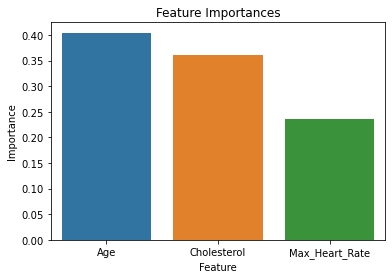

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
data = {
    'Age': [29, 45, 50, 39, 48, 50, 55, 60, 62, 43],
    'Cholesterol': [220, 250, 230, 180, 240, 290, 310, 275, 300, 280],
    'Max_Heart_Rate': [180, 165, 170, 190, 155, 160, 150, 140, 130, 148],
    'Heart_Disease': [0, 1, 1, 0, 1, 1, 1, 1, 1, 0]
}
df = pd.DataFrame(data)

# Independent variables (features) and dependent variable (target)
X = df[['Age', 'Cholesterol', 'Max_Heart_Rate']]
y = df['Heart_Disease']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating and training the random forest model
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Feature importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(f"Feature Importances:\n{feature_importances}")

# Plotting the feature importances
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

#### Explanation of the Code

1. Libraries: We import necessary libraries like numpy, pandas, sklearn, matplotlib, and seaborn.
2. Data Preparation: We create a DataFrame containing features (Age, Cholesterol, Max_Heart_Rate) and the target variable (Heart_Disease).
3. Feature and Target: We separate the features and the target variable.
4. Train-Test Split: We split the data into training and testing sets.
5. Model Training: We create a RandomForestClassifier model with 100 trees and train it using the training data.
6. Predictions: We use the trained model to predict heart disease for the test set.
7. Evaluation: We evaluate the model using accuracy, confusion matrix, and classification report.
8. Feature Importance: We compute and display the importance of each feature.
9. Visualization: We plot the feature importances to visualize which features contribute most to the model's predictions.


#### Evaluation Metrics

- Accuracy: The proportion of correctly classified instances among the total instances.
- Confusion Matrix: Shows the counts of true positives, true negatives, false positives, and false negatives.
- Classification Report: Provides precision, recall, F1-score, and support for each class.
